In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Weather data from 2014 – mid November 2018
nyc_weather = pd.read_csv("1557522.csv", low_memory=False)

### Clean the Data

For this exercise, we only want to pull the hourly weather data from the dataset.

In [4]:
# we only want the hourly data and the date from this
nyc_weather.columns

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'REPORTTPYE', 'HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY',
       'HOURLYPRSENTWEATHERTYPE', 'HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC',
       'HOURLYWETBULBTEMPF', 'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempF',
       'HOURLYDewPointTempC', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYWindGustSpeed', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYPressureChange',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'DAILYMaximumDryBulbTemp', 'DAILYMinimumDryBulbTemp',
       'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
       'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp',
       'DAILYAverageWetBulbTemp', 'DAILYHeatingDegreeDays',
       'DAILYCoolingDegreeDays', 'DAILYSunrise', 'DAILYSunset', 'DAILYWeather',
       'DAILYPrecip', 'DAILYSnowfall', 'DAILYSnowDepth',
       'DAILYAverageStatio

In [5]:
hourly = nyc_weather[['DATE', 'HOURLYVISIBILITY',
       'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF', 'HOURLYDewPointTempF',
       'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting']]

# everything needs to be numeric, so let's see what's there
hourly.dtypes

DATE                       object
HOURLYVISIBILITY           object
HOURLYDRYBULBTEMPF         object
HOURLYWETBULBTEMPF        float64
HOURLYDewPointTempF        object
HOURLYRelativeHumidity    float64
HOURLYWindSpeed           float64
HOURLYStationPressure      object
HOURLYPrecip               object
HOURLYAltimeterSetting     object
dtype: object

In [7]:
# change date to date 
hourly.loc[:,'DATE'] = pd.to_datetime(hourly['DATE'])

# extract the hour
hourly.loc[:,'HOUR'] = pd.DatetimeIndex(hourly['DATE']).hour

# convert everything to numeric
hourly.loc[:,'HOURLYVISIBILITY'] = pd.to_numeric(hourly['HOURLYDRYBULBTEMPF'], errors='coerce')
hourly.loc[:,'HOURLYDRYBULBTEMPF'] = pd.to_numeric(hourly['HOURLYDRYBULBTEMPF'], errors='coerce')
hourly.loc[:,'HOURLYDewPointTempF'] = pd.to_numeric(hourly['HOURLYDewPointTempF'], errors='coerce')
hourly.loc[:,'HOURLYStationPressure'] = pd.to_numeric(hourly['HOURLYStationPressure'], errors='coerce')
hourly.loc[:,'HOURLYPrecip'] = pd.to_numeric(hourly['HOURLYPrecip'], errors='coerce')
hourly.loc[:,'HOURLYAltimeterSetting'] = pd.to_numeric(hourly['HOURLYAltimeterSetting'], errors='coerce')

# Create a categorical variable of if it is raining or not
hourly.loc[:,'RAIN'] = np.where(hourly.loc[:,'HOURLYPrecip']>0, 1, 0)

hourly.dtypes

DATE                      datetime64[ns]
HOURLYVISIBILITY                 float64
HOURLYDRYBULBTEMPF               float64
HOURLYWETBULBTEMPF               float64
HOURLYDewPointTempF              float64
HOURLYRelativeHumidity           float64
HOURLYWindSpeed                  float64
HOURLYStationPressure            float64
HOURLYPrecip                     float64
HOURLYAltimeterSetting           float64
HOUR                               int64
RAIN                               int64
dtype: object

In [28]:
hourly.describe().dropna()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOUR,RAIN
count,40913.000000,40913.000000,40913.000000,40913.000000,40913.000000,40913.000000,40913.000000,40913.000000,40913.000000,40913.000000,40913.000000
mean,56.088529,56.088529,49.569599,42.269474,62.984064,5.202698,29.881901,0.011622,30.051373,11.467749,0.163738
std,17.938839,17.938839,16.390273,19.733217,20.340404,3.728215,0.229824,0.051819,0.230774,6.943902,0.370042
min,-1.000000,-1.000000,-2.000000,-19.000000,9.000000,0.000000,28.780000,0.000000,28.940000,0.000000,0.000000
25%,42.000000,42.000000,37.000000,28.000000,47.000000,3.000000,29.740000,0.000000,29.910000,5.000000,0.000000
50%,57.000000,57.000000,51.000000,45.000000,61.000000,5.000000,29.880000,0.000000,30.050000,11.000000,0.000000
75%,71.000000,71.000000,64.000000,58.000000,81.000000,7.000000,30.020000,0.000000,30.190000,18.000000,0.000000
max,96.000000,96.000000,82.000000,78.000000,100.000000,26.000000,30.680000,1.690000,30.850000,23.000000,1.000000


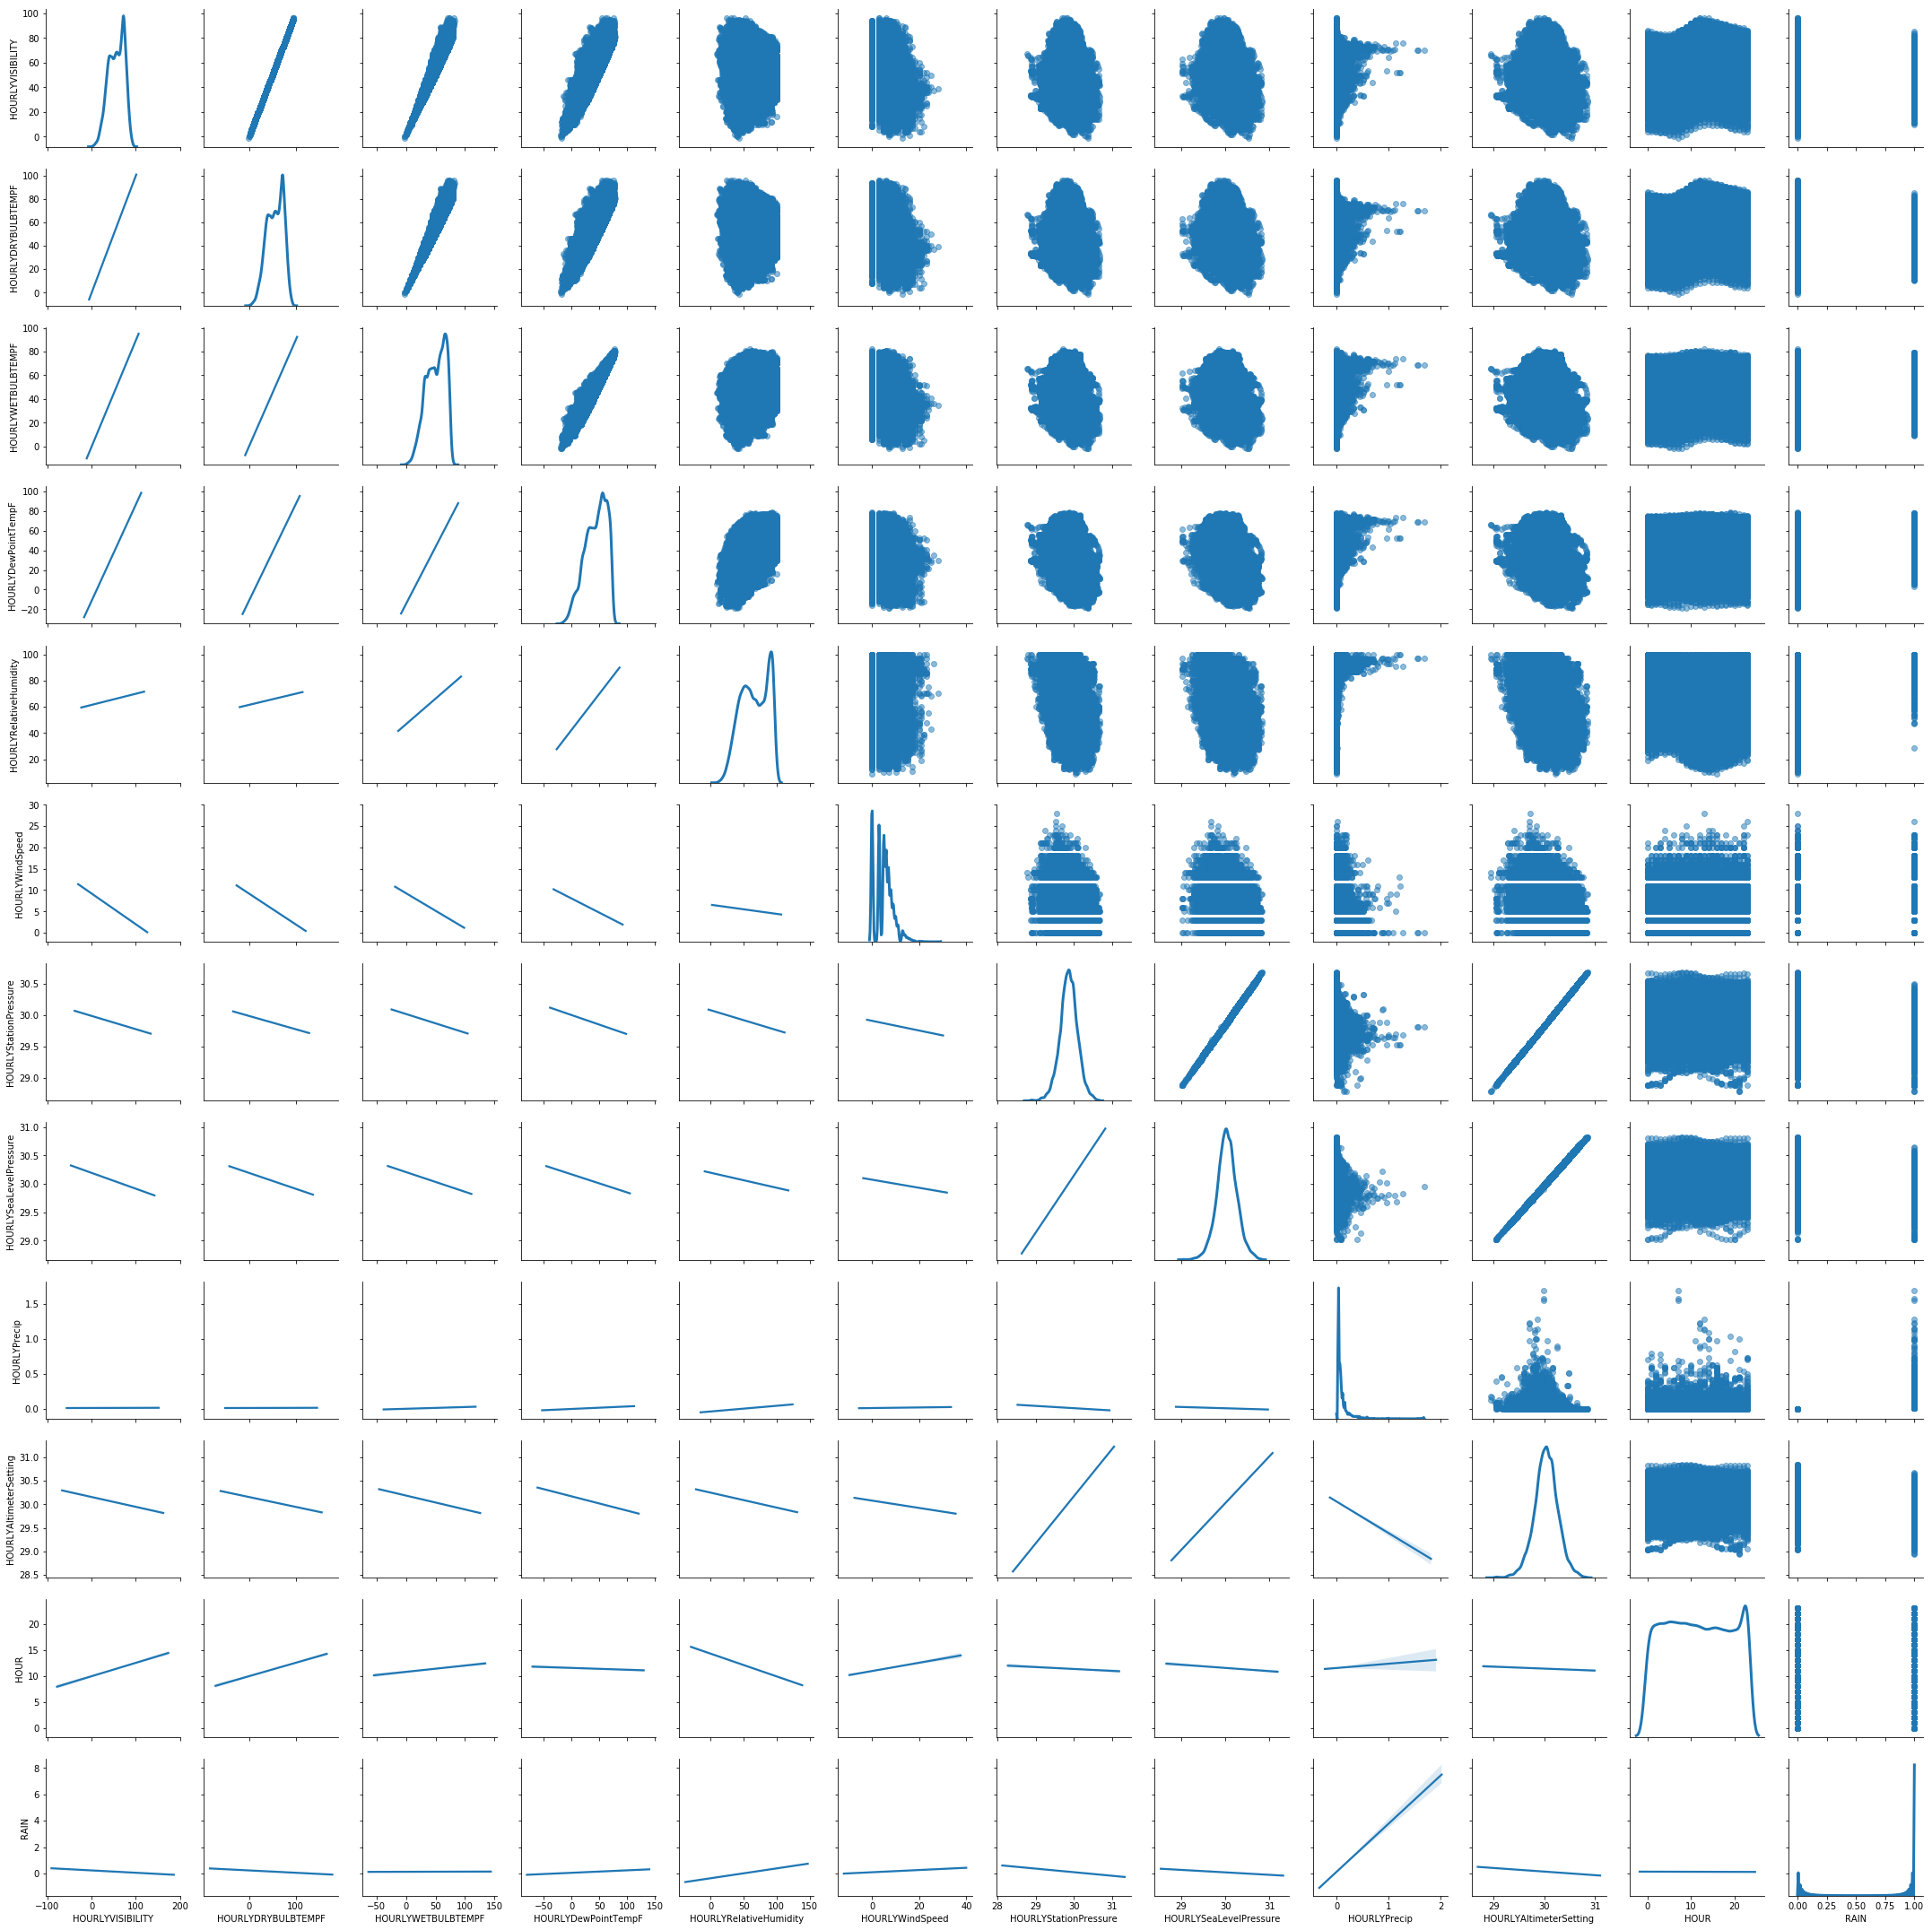

In [79]:
g = sns.PairGrid(hourly, diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

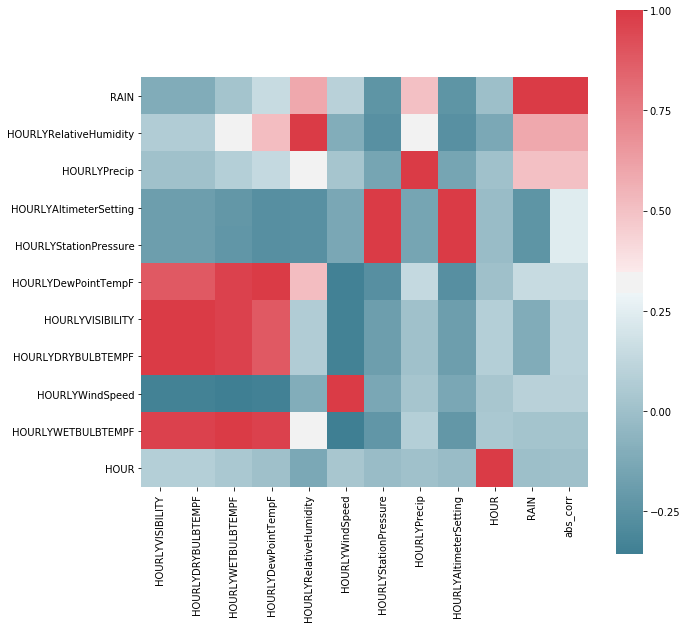

In [22]:
hourly = hourly.dropna()

# sort corr map by Rain

corrmat = hourly.corr()
corrmat["abs_corr"] = abs(corrmat['RAIN'])
corrmat = corrmat.sort_values("abs_corr", ascending=False)
corrmat
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, square=True, cmap=cmap)
plt.show()

In [23]:
hourly.columns

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'HOUR', 'RAIN'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
features = ['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
            'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
            'HOURLYStationPressure', 'HOURLYAltimeterSetting', 'HOUR']

# Separating out the features
x = hourly.loc[:, features].values
# Separating out the target
y = hourly.loc[:,['RAIN']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2'])

In [34]:
hourly_ = pd.concat([principalDf, hourly], axis = 1).dropna().reset_index()
hourly_.head().dropna()

,index,pc1,pc2,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOUR,RAIN
0,0,3.795699,-0.885637,2014-01-01 00:51:00,25.0,25.0,20.0,6.0,44.0,3.0,30.13,0.0,30.30,0.0,0.0
1,1,4.184905,-0.580789,2014-01-01 01:51:00,25.0,25.0,20.0,5.0,42.0,9.0,30.16,0.0,30.33,1.0,0.0
2,2,4.236082,-0.628030,2014-01-01 02:51:00,24.0,24.0,19.0,6.0,46.0,9.0,30.18,0.0,30.35,2.0,0.0
3,3,4.249060,-0.686137,2014-01-01 03:51:00,24.0,24.0,19.0,6.0,46.0,9.0,30.19,0.0,30.36,3.0,0.0
4,4,3.737765,-1.469151,2014-01-01 04:51:00,24.0,24.0,20.0,7.0,48.0,0.0,30.20,0.0,30.37,4.0,0.0


### Feature Selection

Let's run SelectKBest to see which features will work best in the model.

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

# pull out the features
features = ['HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
            'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
            'HOURLYStationPressure', 'HOURLYAltimeterSetting', 'HOUR', 'pc1','pc2']

X = hourly_.loc[:,features]
y = hourly_.loc[:,['RAIN']]

# place results into a dataframe
selector=SelectKBest(score_func=f_classif,k=11)
selector.fit(X,y)
scores = pd.DataFrame()
scores["Attribute"] = features
scores["F Score"] = selector.scores_
scores["P Value"] = selector.pvalues_
scores["Support"] = selector.get_support()

scores.sort_values(by=['F Score'], ascending=False)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Attribute,F Score,P Value,Support
4,HOURLYRelativeHumidity,17106.002842,0.000000e+00,True
7,HOURLYAltimeterSetting,1620.002373,0.000000e+00,True
6,HOURLYStationPressure,1614.384901,0.000000e+00,True
3,HOURLYDewPointTempF,664.679472,5.092922e-145,True
0,HOURLYVISIBILITY,421.438996,5.032995e-93,True
1,HOURLYDRYBULBTEMPF,421.438996,5.032995e-93,True
5,HOURLYWindSpeed,369.966667,5.807101e-82,True
10,pc2,37.812264,7.885339e-10,True
9,pc1,8.315241,3.934119e-03,True
2,HOURLYWETBULBTEMPF,4.534252,3.323093e-02,True


### Create the Decision Tree

It looks as if only the top 3 features would be of any use to us in the model, with humidity being far and away the most useful. Every other features P Value is much too high.

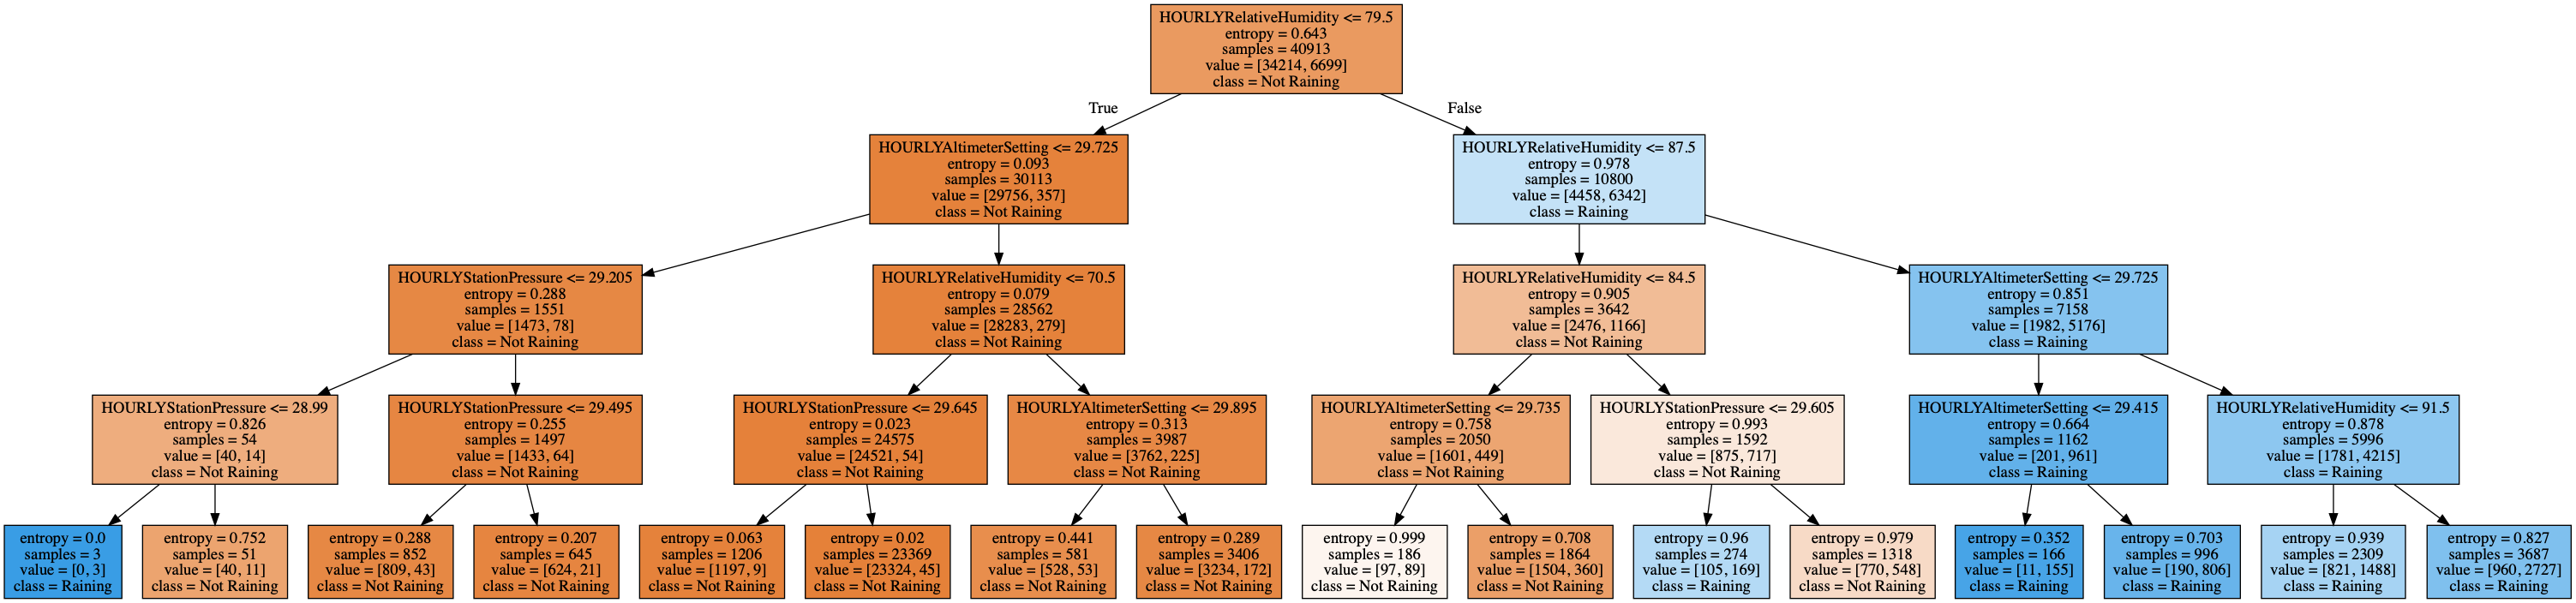

In [25]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

X = hourly.loc[:,['HOURLYRelativeHumidity', 'HOURLYAltimeterSetting', 'HOURLYStationPressure']]
y = hourly.loc[:,['RAIN']]

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1000
)
decision_tree.fit(X, y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Raining', 'Raining'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
print(Image(graph.create_png()))

### Test against Random Forest

Let's see how the model performs against the random forest model.

In [30]:
from sklearn.model_selection import cross_val_score
from datetime import datetime
start_time = datetime.now()

print(cross_val_score(decision_tree, X, y, cv=10))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

[0.90224829 0.92864125 0.9044477  0.92155425 0.92495722 0.93180152
 0.90491322 0.82987045 0.93277927 0.89095355]
Duration: 0:00:00.103368


In [28]:
from sklearn import ensemble
from datetime import datetime
start_time = datetime.now()

rfc = ensemble.RandomForestClassifier(n_estimators=100)

X = hourly[['HOURLYRelativeHumidity', 'HOURLYAltimeterSetting', 'HOURLYStationPressure']]
y = hourly['RAIN']
rfc.fit(X,y)

print(cross_val_score(rfc, X, y, cv=10))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

[0.89638319 0.91764418 0.90004888 0.88685239 0.90295771 0.92080176
 0.87924713 0.88511366 0.91444635 0.8591687 ]
Duration: 0:00:13.608978
